In [1]:
from pathlib import Path
import os
import sys
from joblib import load
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image
import random
import matplotlib.pyplot as plt

random.seed(1)

In [2]:
PROJECT_DIR = Path(os.getcwd()).parent
sys.path.append(str(PROJECT_DIR))

In [3]:
from src.utils.dirutils import get_data_dir

In [4]:
INTERIM_DATA_DIR = get_data_dir() / 'interim'

In [5]:
embeddings = load(INTERIM_DATA_DIR / "clip" / "dataset_embeddings.joblib")

In [6]:
example_image = "a-mishra_expression-of-sadness-i.jpg"
cosine_similarity([embeddings[example_image]["img_embedding"]], [embeddings[example_image]["caption_embedding"]])

array([[0.25390986]])

In [7]:
for key in embeddings:
    embeddings[key]["clip_score"] = cosine_similarity([embeddings[key]["img_embedding"]], [embeddings[key]["caption_embedding"]])[0][0]

In [8]:
captions_df = pd.read_csv(get_data_dir() / "raw" / "artgraph_captions.csv")
captions_df.sort_values(by="image", inplace=True)

In [9]:
for i, key in enumerate(embeddings.keys()):
    embeddings[key]["caption"] = captions_df.iloc[i]["caption"]

In [10]:
for k, v in embeddings.items():
    print(k, v["clip_score"])
    break

a-mishra_expression-of-sadness-i.jpg 0.25390986221015566


In [11]:
bad_examples = dict((k, v) for k, v in embeddings.items() if v["clip_score"] < 0.15)
average_examples = dict((k, v) for k, v in embeddings.items() if v["clip_score"] >= 0.15 and v["clip_score"] < 0.3)
good_examples = dict((k, v) for k, v in embeddings.items() if v["clip_score"] >= 0.3 and v["clip_score"] < 0.35)
very_good_examples = dict((k, v) for k, v in embeddings.items() if v["clip_score"] >= 0.35)

In [12]:
print("There are {} bad examples".format(len(bad_examples)))
print("There are {} mean examples".format(len(average_examples)))
print("There are {} good examples".format(len(good_examples)))
print("There are {} very good examples".format(len(very_good_examples)))

There are 1835 bad examples
There are 94548 mean examples
There are 18966 good examples
There are 1126 very good examples


In [13]:
# sample 5 randomly from each category
bad_examples = random.sample(list(bad_examples.items()), 8)
average_examples = random.sample(list(average_examples.items()), 8)
good_examples = random.sample(list(good_examples.items()), 8)
very_good_examples = random.sample(list(very_good_examples.items()), 8)

In [14]:
def show_examples(examples):
    for e in examples:
        display(Image.open(get_data_dir() / "raw" / "images" / e[0]))
        print(e[1]["caption"])
        print(e[1]["clip_score"])

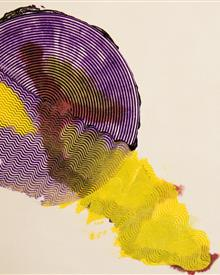

The artwork depicts a rusted and weathered train boxcar, similar to the one in artwork number 5.
0.14866512076754015


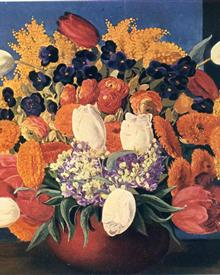

The artwork depicts a cityscape with buildings and a blue sky in the background.
0.10819632189089384


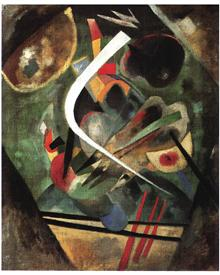

The artwork depicts a white line on a blue background, with various shades of blue surrounding it.
0.13868971847689593


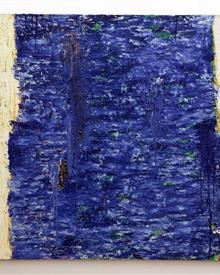

The artwork depicts a collection of delicate and intricate flowers in shades of pink and yellow, against a muted grey background.
0.14412347615801113


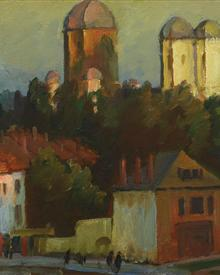

The artwork depicts a picturesque landscape of Câmpulung, with green fields and trees, and the mountains in the background.
0.1443518604598694


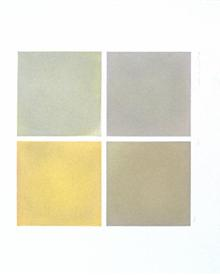

The artwork depicts a sprig of sage with soft green leaves and a textured stem.
0.12071226259396879


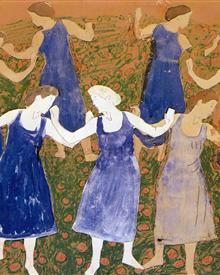

The artwork depicts a vibrant explosion of colors and shapes, with flowers and plants blossoming in an abstract and dreamlike composition.
0.14834338159549543


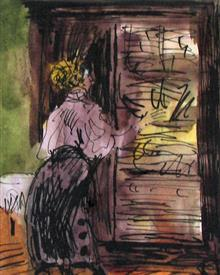

The artwork depicts a castle in the background with several small buildings and people walking in the foreground.
0.14204377137361124


In [15]:
show_examples(bad_examples)

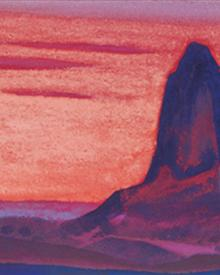

The artwork depicts a series of rock temples set against a dramatic, mountainous landscape, rendered in warm, golden hues.
0.2610939065893242


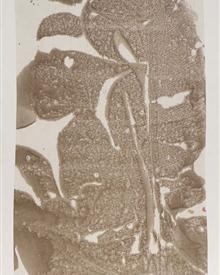

The artwork depicts a mix of colorful brushstrokes on a white background, creating an abstract composition.
0.19262593603053446


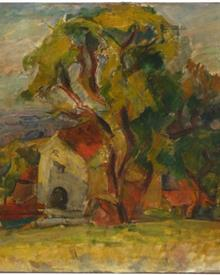

The artwork depicts a serene landscape of a countryside area with a river, trees, and fields in the distance.
0.2228974065140339


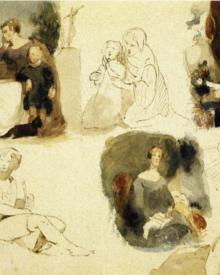

The artwork depicts a sheet of figure studies, featuring various sketches of people in different poses and clothing.
0.29869440124851193


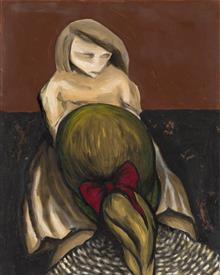

The artwork depicts two girls on a street with houses, trees, and a fence in the background, with black and white colors and a few lines suggesting hair and clothes.
0.18908853342043452


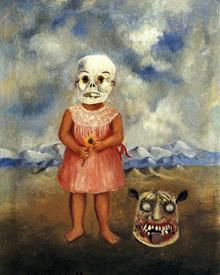

The artwork depicts a little girl holding a mask with a skull while playing with a ball.
0.287039888006419


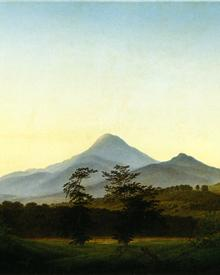

The artwork depicts a tranquil Bohemian landscape with a river flowing through a valley and a castle on a hill.
0.2630003452352646


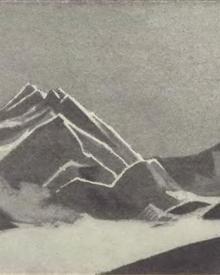

The artwork depicts a snowy mountain range with clouds covering the peaks and a bright sky in the background.
0.24311568248153387


In [16]:
show_examples(average_examples)

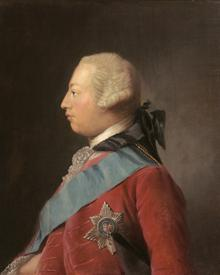

The artwork depicts King George III, wearing a red coat and a wig, with a direct gaze and a confident expression.
0.3236050419247206


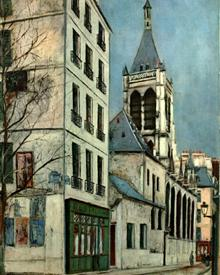

The artwork depicts the Church of St. Severin, with muted colors and loose lines emphasizing the building's shapes and texture.
0.30254981145240856


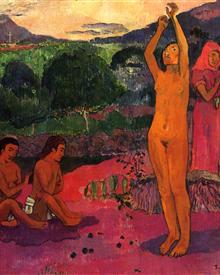

The artwork depicts a group of people in a tropical landscape, gathered around a figure in the center holding a staff.
0.31048867094458044


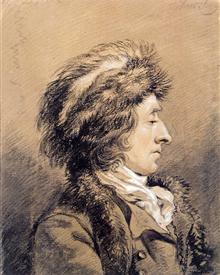

The artwork depicts a man wearing a fur hat, set against a dark background, his features emphasized by bright highlights.
0.320562509759458


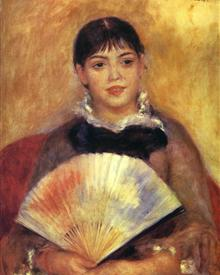

The artwork depicts a young girl with a fan in her hand, sitting at a table.
0.30391906867950413


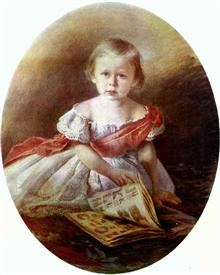

The artwork depicts a portrait of a young girl with light-colored hair, wearing a white dress with a blue sash.
0.31843364277102726


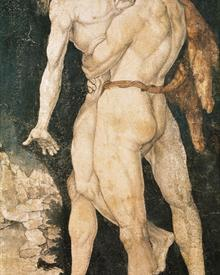

The artwork depicts Hercules wrestling with Antaeus, a giant kneeling on the ground, with a landscape and a river in the background.
0.3071415777817257


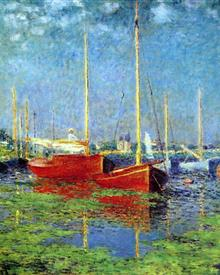

The artwork depicts a colorful depiction of red boats moored along the Seine river, against a background of blue skies and green trees.
0.3185376322537707


In [17]:
show_examples(good_examples)

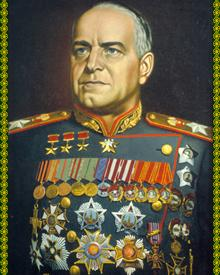

The artwork depicts Georgy Zhukov, a Soviet military commander, in a uniform with medals, looking sternly at the viewer.
0.35112343183954403


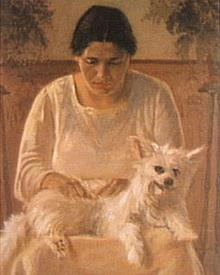

The artwork depicts a portrait of a woman named Hanna Anderson with a dog, with intricate details and delicate brushstrokes capturing the warmth and love of the moment.
0.35150334909175995


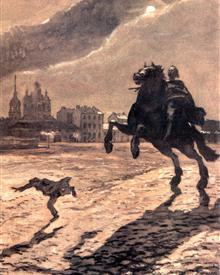

The artwork depicts a design for a book cover for Pushkin's poem "The Bronze Horseman", featuring a human-like figure riding a horse in front of a cityscape, against a colorful background with blue and gold accents.
0.354174489816392


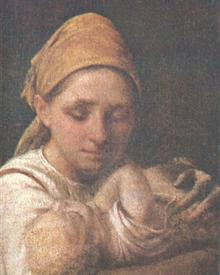

The artwork depicts a peasant woman holding her child close to her chest, both looking straight ahead with a serene expression.
0.35759150002893325


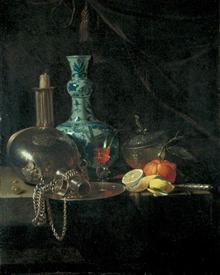

The artwork depicts a still-life composition with various objects, including a flask, a candlestick, a vase, and fruit, against a dark background with a curtain.
0.3713371490707134


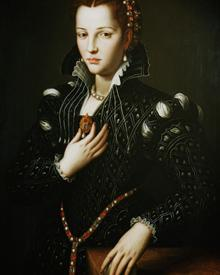

The artwork depicts Lucrezia de' Medici with her red hair, wearing a black dress with golden embroidery, a pearl necklace, and a golden belt.
0.3715964203247353


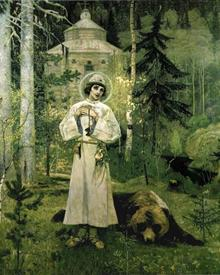

The artwork depicts a young St. Sergius standing in a forest with his hand on a staff and a hut in the background.
0.35930670575652024


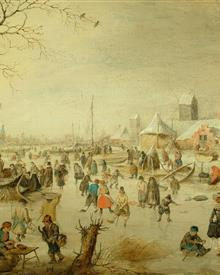

The artwork depicts a winter landscape with skaters.
0.37135042585612543


In [18]:
show_examples(very_good_examples)

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 4.000e+00, 1.000e+00,
        2.000e+00, 3.000e+00, 5.000e+00, 7.000e+00, 1.300e+01, 1.000e+01,
        1.500e+01, 1.200e+01, 3.000e+01, 3.100e+01, 3.700e+01, 4.500e+01,
        6.800e+01, 7.100e+01, 8.300e+01, 9.500e+01, 1.500e+02, 1.570e+02,
        1.780e+02, 1.920e+02, 2.100e+02, 2.610e+02, 3.360e+02, 3.870e+02,
        4.220e+02, 4.760e+02, 6.070e+02, 7.000e+02, 7.880e+02, 8.670e+02,
        9.530e+02, 1.131e+03, 1.260e+03, 1.364e+03, 1.579e+03, 1.716e+03,
        1.907e+03, 2.189e+03, 2.270e+03, 2.500e+03, 2.793e+03, 2.985e+03,
        3.070e+03, 3.278e+03, 3.511e+03, 3.735e+03, 3.837e+03, 3.968e+03,
        4.072e+03, 4.124e+03, 4.201e+03, 4.110e+03, 4.146e+03, 4.099e+03,
        4.132e+03, 3.857e+03, 3.799e+03, 3.629e+03, 3.345e+03, 3.162e+03,
        2.898e+03, 2.544e+03, 2.409e+03, 2.102e+03, 1.875e+03, 1.546e+03,
        1.294e+03, 1.048e+03, 8.380e+0

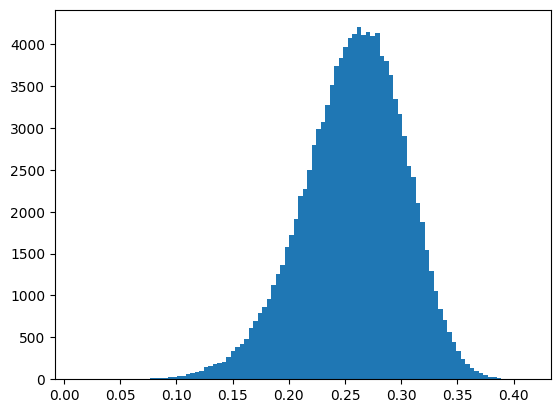

In [19]:
clip_scores = [v["clip_score"] for k, v in embeddings.items()]
plt.hist(clip_scores, bins=100)

In [20]:
print("Mean clip score: {}".format(np.mean(clip_scores)))
print("Min clip score: {}".format(np.min(clip_scores)))
print("Max clip score: {}".format(np.max(clip_scores)))

Mean clip score: 0.25749037526625945
Min clip score: 0.011852291624347634
Max clip score: 0.41317010715396973


In [21]:
with open(get_data_dir() / "raw" / "splits" / "train.txt", "r") as f:
    train_image_names = f.readlines()
    # remove newlines
    train_image_names = set([x.strip() for x in train_image_names])

len(train_image_names)

81382

In [22]:
total_clip_weight = 0
n_weighted_samples = 0
for k, v in embeddings.items():
    if k in train_image_names and v["clip_score"] >= 0.15:
        total_clip_weight += v["clip_score"] * 8 - (1/5)
        n_weighted_samples += 1
total_clip_weight / n_weighted_samples

1.8750954862130893

In [23]:
print(f"The weighted dataset is {total_clip_weight / len(train_image_names)} times larger than the original dataset")

The weighted dataset is 1.8461794502936302 times larger than the original dataset


In [24]:
bad_examples_idxs = [5, 6]
average_examples_idxs = [4, 5]
good_examples_idxs = [7]
very_good_examples_idxs = [1]

In [25]:
images = [bad_examples[i] for i in bad_examples_idxs] + [average_examples[i] for i in average_examples_idxs] + [good_examples[i] for i in good_examples_idxs] + [very_good_examples[i] for i in very_good_examples_idxs]

In [26]:
images[0][1]

{'img_embedding': array([ 1.01705983e-01, -1.15854308e-01,  4.44747061e-01,  1.25868097e-01,
         5.29524125e-02, -3.69984835e-01,  1.01141229e-01,  5.21360815e-01,
        -1.48415431e-01,  4.44887936e-01,  7.77493417e-03,  1.52776763e-02,
        -3.47087145e-01,  5.51561594e-01,  7.94342011e-02, -3.31454933e-01,
        -1.42594278e-01,  2.29803100e-01, -3.42964023e-01,  1.05190963e-01,
        -6.40212536e-01, -4.72585261e-01,  1.13980599e-01,  7.41049051e-01,
        -3.21630657e-01,  2.34088078e-01, -1.73690230e-01,  2.58082271e-01,
         4.93651740e-02,  2.29427159e-01,  8.28405991e-02, -3.76244724e-01,
         3.21151704e-01, -3.55379134e-02, -4.40154076e-01, -6.96191862e-02,
        -4.79456186e-01, -2.33412534e-03,  3.72411430e-01, -1.26925513e-01,
         2.23373950e-01, -4.26557481e-01, -3.31345439e-01,  3.41720730e-01,
         8.58201459e-02, -2.24666929e+00, -8.99973884e-03,  3.80050808e-01,
         5.95480144e-01,  7.77660161e-02, -2.01851368e-01, -2.36783251e

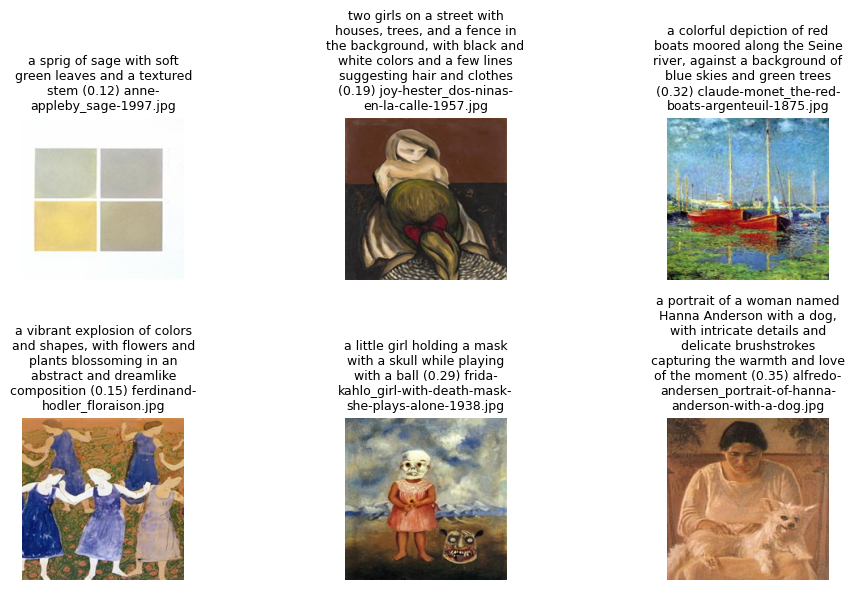

In [29]:
import matplotlib.pyplot as plt
import textwrap
from PIL import Image

# Sample image paths and descriptions
image_paths = [image[0] for image in images]
descriptions = [image[1]["caption"] for image in images]
scores = [image[1]["clip_score"] for image in images]

# Resize parameters
resize_width = 200
resize_height = 200

# Create a figure and axis for the grid
fig, axs = plt.subplots(2, 3, figsize=(10, 6))

# Iterate over the images and descriptions
for i, (image_path, description, score) in enumerate(zip(image_paths, descriptions, scores)):
    # Load and resize the image
    img = Image.open(get_data_dir() / "raw" / "images" / image_path)
    # save image to current dir
    img.save(image_path)
    img = Image.open(get_data_dir() / "raw" / "images" / image_path).resize((resize_width, resize_height))

    # Calculate the subplot index
    row = i % 2
    col = i // 2

    # Plot the image in the corresponding subplot
    axs[row, col].imshow(img)
    axs[row, col].axis('off')

    # Wrap the description text if it is too long
    description = description.replace("The artwork depicts ", "")
    description = description.replace(".", "")
    description += f" ({score:.2f}) {image_path}"
    wrapped_text = textwrap.fill(description, 30)  # Adjust the line width as needed

    # Add the wrapped text as a subtitle under the image
    axs[row, col].set_title(wrapped_text, fontsize=9)  # Adjust the font size as needed

# Adjust the spacing between subplots
plt.tight_layout()

# Show the grid of images with descriptions
# save hd version of the image
plt.savefig(INTERIM_DATA_DIR / "clip" / "clip_examples.png", dpi=300)
plt.show()
